<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions-for-web-scripting" data-toc-modified-id="Functions-for-web-scripting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong><em>Functions for web scripting</em></strong></a></span><ul class="toc-item"><li><span><a href="#Installation-of-the-necessary-libraries" data-toc-modified-id="Installation-of-the-necessary-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Installation of the necessary libraries</em></a></span></li><li><span><a href="#Importing-important-libraries" data-toc-modified-id="Importing-important-libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><em>Importing important libraries</em></a></span></li><li><span><a href="#Functions-to-scroll-the-page" data-toc-modified-id="Functions-to-scroll-the-page-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><em>Functions to scroll the page</em></a></span></li><li><span><a href="#Function-to-download-data-of-interest-from-the-following-sites:." data-toc-modified-id="Function-to-download-data-of-interest-from-the-following-sites:.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><em>Function to download data of interest from the following sites:</em>.</a></span></li><li><span><a href="#Function-that-converts-data-into-dictionaries-with-lists" data-toc-modified-id="Function-that-converts-data-into-dictionaries-with-lists-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><em>Function that converts data into dictionaries with lists</em></a></span></li><li><span><a href="#Function-for-web-scripting." data-toc-modified-id="Function-for-web-scripting.-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span><em>Function for web scripting</em>.</a></span></li><li><span><a href="#Function-that-checks-the-number-of-pages-with-advertisements" data-toc-modified-id="Function-that-checks-the-number-of-pages-with-advertisements-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span><em>Function that checks the number of pages with advertisements</em></a></span></li></ul></li><li><span><a href="#Capture-all-data" data-toc-modified-id="Capture-all-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong><em>Capture all data</em></strong></a></span><ul class="toc-item"><li><span><a href="#Adres-url" data-toc-modified-id="Adres-url-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><em>Adres url</em></a></span></li><li><span><a href="#Number-of-pages" data-toc-modified-id="Number-of-pages-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><em>Number of pages</em></a></span></li><li><span><a href="#Data-extracted-from-web-scripting" data-toc-modified-id="Data-extracted-from-web-scripting-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><em>Data extracted from web scripting</em></a></span></li></ul></li><li><span><a href="#Data-as-DataFrame" data-toc-modified-id="Data-as-DataFrame-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong><em>Data as DataFrame</em></strong></a></span><ul class="toc-item"><li><span><a href="#Pandas-library-import" data-toc-modified-id="Pandas-library-import-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pandas library import</a></span></li><li><span><a href="#Changing-the-object-to-a-DataFrame" data-toc-modified-id="Changing-the-object-to-a-DataFrame-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Changing the object to a DataFrame</a></span></li><li><span><a href="#Saving-the-object-as-a-csv-file" data-toc-modified-id="Saving-the-object-as-a-csv-file-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Saving the object as a csv file</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong><em>Data analysis</em></strong></a></span><ul class="toc-item"><li><span><a href="#Importing-important-libraries" data-toc-modified-id="Importing-important-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><em>Importing important libraries</em></a></span></li><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><em>Data loading</em></a></span></li><li><span><a href="#Area-density-chart" data-toc-modified-id="Area-density-chart-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><em>Area density chart</em></a></span></li><li><span><a href="#Price-density-chart" data-toc-modified-id="Price-density-chart-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span><em>Price density chart</em></a></span></li></ul></li></ul></div>

# ***House prices in Poland***

## ***Functions for web scripting***

### *Installation of the necessary libraries*

In [1]:
%pip install selenium 
%pip install beautifulsoup4
%pip install price_parser

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### *Importing important libraries*

In [2]:
import time 
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from price_parser import Price

### *Functions to scroll the page*

In [3]:
def scrollDown(driver, value):
    driver.execute_script("window.scrollBy(0,"+str(value)+")")

In [4]:
def scrollDownAllTheWay(driver):
    old_page = driver.page_source
    while True:
#         print("Scrolling down...")
        for i in range(2):
            scrollDown(driver, 5000)
            time.sleep(0.2)
        new_page = driver.page_source
        if new_page != old_page:
            old_page = new_page
        else:
            break
    return True

### *Function to download data of interest from the following sites:*.
* the place where the house is located
* price per property
* price per m2
* number of rooms 
* area of the house 

In [5]:
def get_data_from_pages(html):
    info = []
    soup = BeautifulSoup(html, 'html.parser')
    all_search = soup.find('div', {'data-cy':"search.listing.organic"})
    
    for li in all_search.find_all('li', {"data-cy":"listing-item"}):
        city = li.find('p', class_='css-14aokuk e1n6ljqa7').text
        div = li.find('div', class_="e1n6ljqa19 css-6vtodn ei6hyam0")
        all_span = div.find_all('span')
        date = []
        date.append(city)
        
        for span in range(len(all_span)):
            date.append(all_span[span].text)
        info.append(date) 
    new_info = []
    
    for i in range(len(info)):
        if len(info[i]) > 4 and info[i][1] != 'Zapytaj o cenę':
            new_info.append(info[i])
    info = new_info     
    
    for i in range(len(new_info)):
        for j in range(len(new_info[i])):
            new_info[i][j] = new_info[i][j].replace('\xa0', '')
        new_info[i][1] = int(Price.fromstring(new_info[i][1]).amount)
        new_info[i][2] = Price.fromstring(new_info[i][2]).amount
        new_info[i][3] = int(new_info[i][3].replace(' pokój','').replace(' pokoje', '').replace('pokoi', '').replace('+ ',''))
        new_info[i][4] = int(float(new_info[i][4].replace(' m²','')))
        
    return new_info 

### *Function that converts data into dictionaries with lists*

In [6]:
def all_data_dict(info):
    town = []
    price = []
    price_per_m2 = []
    number_of_rooms = []
    area = []
    data = {}
    for i in range(len(info)):
        if info[i][4] <= 1000:
            town.append(info[i][0])
            price.append(info[i][1])
            price_per_m2.append(info[i][2])
            number_of_rooms.append(info[i][3])
            area.append(info[i][4])
    data['town'] = town
    data['price'] = price
    data['price per m2'] = price_per_m2
    data['number of rooms'] = number_of_rooms
    data['area'] = area
    
    return data

### *Function for web scripting*.
A function that pulls data from a page and changes it 

In [7]:
def web_scripping(url, number_of_pages):
    info = []
    driver = webdriver.Safari()
    driver.get(url)
    
    start_time = time.time()
    for i in range(number_of_pages):
        percentage = round((i+1)/number_of_pages * 100, 1)
        if percentage % 5 == 0:
            print(percentage, '%')
        scrollDownAllTheWay(driver)
        html = driver.page_source
        info += get_data_from_pages(html)
        while True:
            try:
                driver.execute_script("document.querySelector(\"button[data-cy='pagination.next-page']\").click()")
                break
            except:
                pass
        time.sleep(2)
    driver.close()
    data = all_data_dict(info)
    return data

### *Function that checks the number of pages with advertisements*

In [8]:
from urllib.request import urlopen
import math
def numbers_of_pages(url):
    page = urlopen(url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    number_of_offers = int(soup.find('span', class_='css-19fwpg e17mqyjp2').text)
    return math.ceil(number_of_offers/72)

## ***Capture all data***

### *Adres url*

In [9]:
url = 'https://www.otodom.pl/pl/oferty/sprzedaz/dom/cala-polska?page=1&limit=72&ownerTypeSingleSelect=ALL&by=DEFAULT&direction=DESC&viewType=listing'

### *Number of pages*

In [10]:
number_of_pages = numbers_of_pages(url)
number_of_pages

762

### *Data extracted from web scripting*

In [11]:
data = web_scripping( url, number_of_pages)

5.0 %
10.0 %
15.0 %
35.0 %
40.0 %
45.0 %
50.0 %
55.0 %
60.0 %
65.0 %
85.0 %
90.0 %
95.0 %
100.0 %


## ***Data as DataFrame***

### Pandas library import

In [12]:
import pandas as pd

###  Changing the object to a DataFrame

In [13]:
df = pd.DataFrame(data)
pd.set_option('display.max_rows', None)

### Saving the object as a csv file

In [14]:
df.to_csv('houses_in_poland.csv', index=False)

## ***Data analysis***

### *Importing important libraries*

In [1]:
import matplotlib
# matplotlib.use('TkAgg')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### *Data loading*

In [2]:
df = pd.read_csv('houses_in_poland.csv')
print(df.head())

                                          town    price  price per m2  \
0     Sopot, Dolny, Dr Aleksandra Majkowskiego  5450000       33725.0   
1             ul. Leśna, Nasielsk, mazowieckie   650000        2826.0   
2  ul. Szczęśliwa, Pietrzykowice, dolnośląskie   610000        6421.0   
3                  Gdynia, Orłowo, Bernadowska  3850000       19744.0   
4               ul. Kręta, Zakręt, mazowieckie   930000        6110.0   

   number of rooms  area  
0                8   161  
1                5   230  
2                4    95  
3                4   195  
4                5   152  


### *Area density chart*

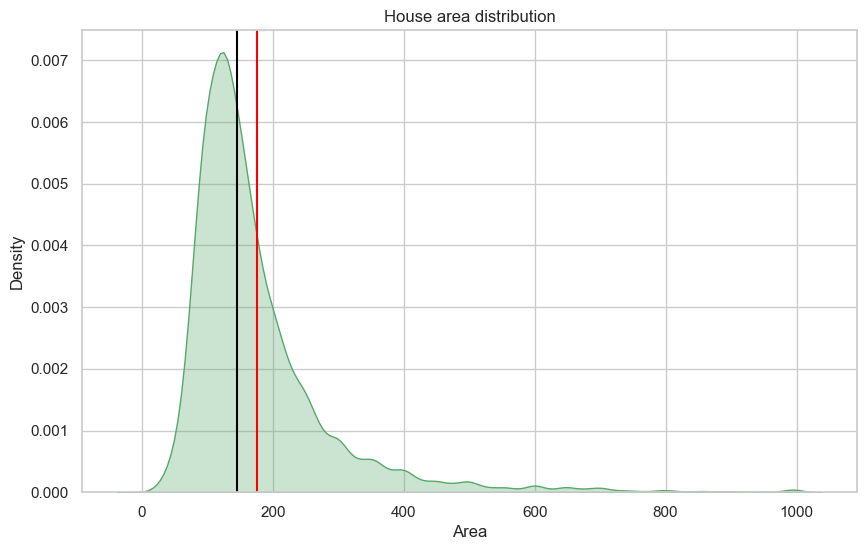

In [3]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(df['area'], color='g', fill=True, alpha=0.3)
plt.axvline(df['area'].median(), color='black')
plt.axvline(df['area'].mean(), color='red')
plt.title('House area distribution')
plt.xlabel('Area')
plt.ylabel('Density')
plt.show()

In [4]:
df['area'].max()

1000

### *Price density chart*

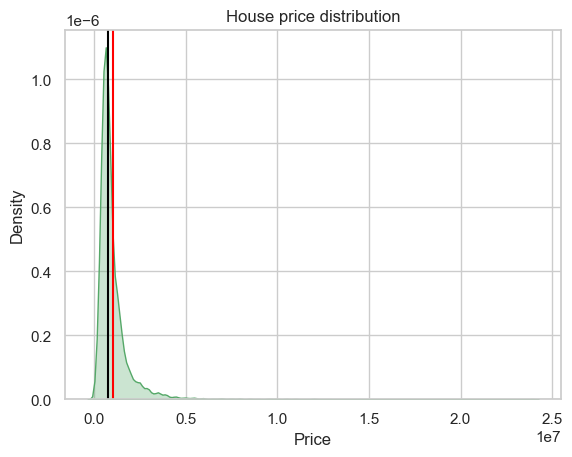

In [5]:
sns.kdeplot(df['price'], color='g', fill=True, alpha=0.3)
plt.axvline(df['price'].median(), color='black')
plt.axvline(df['price'].mean(), color='red')
plt.title('House price distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()